# Customer Propensity to Purchase

## Introduction: Business Problem


With the recent Coronavirus keeping people at home more often now, online traffic to eCommerce has been on the rise. Even with the surge in visitors, we know only a small percentage of them are likely to purchase a product, while most will perhaps not even return.
Instead of spending money to re-market to everyone, we could use machine learning to identify the most valuable prospects for targeting the most likely customers.

## Data

In [25]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('training_sample.csv')
test = pd.read_csv('testing_sample.csv')

In [27]:
# Dimensions of train and test data
print(train.shape)
print(test.shape)

(455401, 24)
(151655, 25)


In [12]:
# Having a look at the first 5 rows
train.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,1


In [13]:
train.dtypes

basket_icon_click          int64
basket_add_list            int64
basket_add_detail          int64
sort_by                    int64
image_picker               int64
account_page_click         int64
promo_banner_click         int64
detail_wishlist_add        int64
list_size_dropdown         int64
closed_minibasket_click    int64
checked_delivery_detail    int64
checked_returns_detail     int64
sign_in                    int64
saw_checkout               int64
saw_sizecharts             int64
saw_delivery               int64
saw_account_upgrade        int64
saw_homepage               int64
device_mobile              int64
device_computer            int64
device_tablet              int64
returning_user             int64
loc_uk                     int64
ordered                    int64
dtype: object

#### Data dictionary of columns

1. basket_icon_click: Did the visitor click on the shopping basket icon? (Binary)
2. basket_add_list: Did the visitor add a product to their shopping cart on the 'list' page? (Binary)
3. basket_add_detail: Did the visitor add a product to their shopping cart on the 'detail' page? (Binary)
4. sort_by: Did the visitor sort products on a page? (Binary)
5. image_picker: Did the visitor use the image picker? (Binary)
6. account_page_click: Did the visitor visit their account page? (Binary)
7. promo_banner_click: Did the visitor interact with a product drop down?
8. detail_wishlist_add: Did the visitor close their mini shopping basket? (Binary)
9. list_size_dropdown: Did the visitor interact with a product dropdown? (Binary)
10. closed_minibasket_click: Did the visitor close their mini shopping basket? (Binary)
11. saw_sizecharts: Did the visitor view a product size cart? (Binary)
12. saw_delivery: Did the visitor view the delivery FAQ page? (Binary)
13. saw_account_upgrade: Did the visitor view the account upgrade page? (Binary)
14. saw_homepage: Did the visitor view the website homepage? (Binary)
15. device_mobile: Was the visitor on a mobile device? (Binary)
16. device_computer: Was the visitor on a desktop device? (Binary)
17. device_tablet: Was the visitor on a table device? (Binary)
18. returning_user: Was the visitor new or returning? (Binary)
19. loc_uk: Was the visitor located in the UK, based on their IP address? (Binary)
20. ordered: Did the customer place an order? (Target variable, 0 or 1)

##### This is an interesting dataset because all of the indepdent variables are of binary type.

In [14]:
# Provides a quick summary of the dataset
train.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 24 columns):
basket_icon_click          455401 non-null int64
basket_add_list            455401 non-null int64
basket_add_detail          455401 non-null int64
sort_by                    455401 non-null int64
image_picker               455401 non-null int64
account_page_click         455401 non-null int64
promo_banner_click         455401 non-null int64
detail_wishlist_add        455401 non-null int64
list_size_dropdown         455401 non-null int64
closed_minibasket_click    455401 non-null int64
checked_delivery_detail    455401 non-null int64
checked_returns_detail     455401 non-null int64
sign_in                    455401 non-null int64
saw_checkout               455401 non-null int64
saw_sizecharts             455401 non-null int64
saw_delivery               455401 non-null int64
saw_account_upgrade        455401 non-null int64
saw_homepage               455401 non-null int64
device_

In [23]:
# Checking the target variable
train['ordered'].value_counts()

0    436308
1     19093
Name: ordered, dtype: int64

- We can see here that we have a class imbalance
- Therefore we have to perform some sampling methods (Oversampling the minority class or undersampling the majority class) to build a robust model

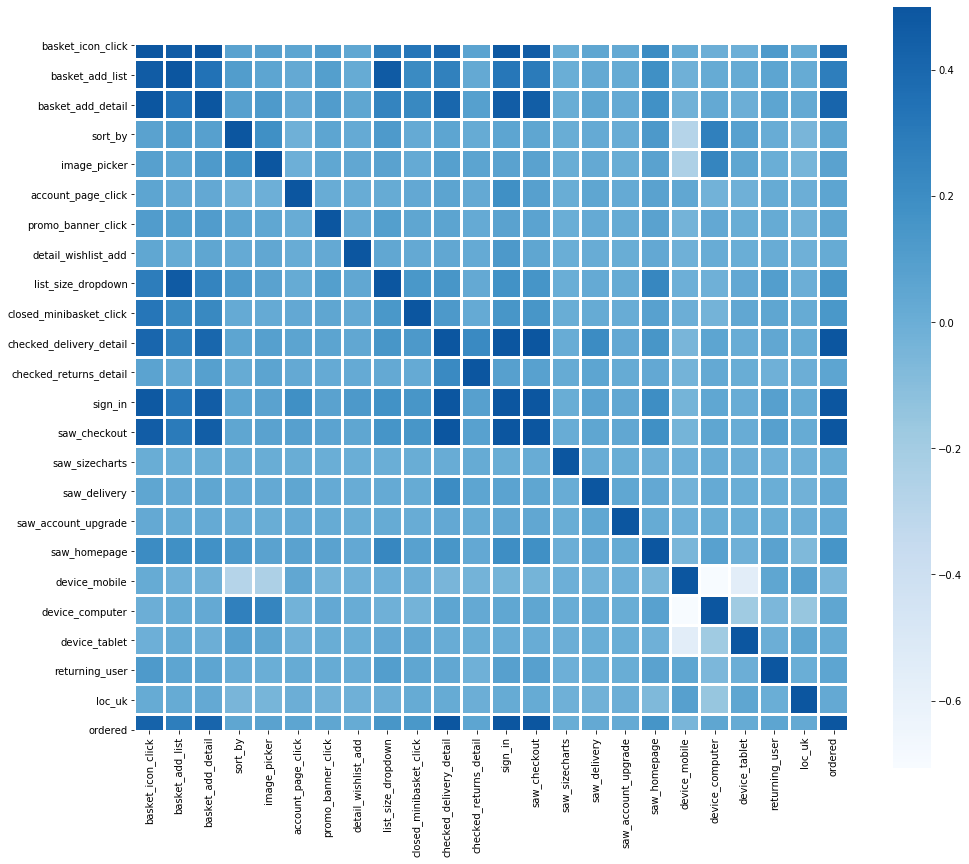

In [16]:
# View correlation heatmap of all variables
corr = train.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [17]:
# Drop target column for training
predictors = train.drop(['ordered'], axis=1)

targets = train.ordered

In [18]:
print(predictors.columns)

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk'],
      dtype='object')


### Preparing data for modelling

In [20]:
import os
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [40]:
import imblearn

In [28]:

X_train, X_test, y_train, y_test  =   train_test_split(predictors, targets, test_size=.3)

print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )

Predictor - Training :  (318780, 23) Predictor - Testing :  (136621, 23)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.9932
